In [182]:
import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt
import pandas            as pd
import lsqfit
import itertools
from tqdm import tqdm

In [183]:
from b2heavy.FnalHISQMetadata import params as mData

In [184]:
from b2heavy.ThreePointFunctions.globalfit import RatioSet

In [185]:
DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'
DATA_2PT = '/Users/pietro/Desktop/lattice24/0.25/corr2_3'

In [249]:
ens = 'Coarse-2'
a = mData(ens)['aSpc'].mean
T = 1
t = a*T

for ens in ['MediumCoarse','Coarse-2','Coarse-Phys','Coarse-1','Fine-1','Fine-Phys','SuperFine']:
    a = mData(ens)['aSpc'].mean

    print(ens,t/a,round(t/a))

MediumCoarse 0.8289121792555114 1
Coarse-2 1.0 1
Coarse-Phys 1.0240693892302133 1
Coarse-1 1.015323455005421 1
Fine-1 1.3949403686302855 1
Fine-Phys 1.4073003252620169 1
SuperFine 2.177014817491868 2


In [251]:
[ 5*a, 21*a]

[0.2845379992695641, 1.1950595969321691]

In [234]:
ENSEMBLE = 'Coarse-2'

In [235]:
MOMLIST = ['000','100','200','300']
RATLIST = ['QPLUS','RPLUS','RMINUS','XF']

SMSLIST = ['1S','RW']

cov_specs = dict(scale=True,shrink=True,cutsvd=1E-12)

In [236]:
rset = RatioSet(ENSEMBLE,MOMLIST,RATLIST,SMSLIST)
rset.collect(DATA_DIR,DATA_2PT)

100%|██████████| 10/10 [00:01<00:00,  6.81it/s]


In [237]:
priors = rset.params()

In [245]:
TMIN = 1

fit = rset.fit(
    tmin   = TMIN,
    priors = priors,
    **cov_specs
)   

rset.show(fit)


f0                        A_1S  \
mom ratio                                             
000 RPLUS    1.0174(49)  [-0.0150(49), -0.0188(48)]   
100 QPLUS    0.9766(29)   [-0.0372(63), 0.0077(26)]   
    RMINUS  -0.1346(20)    [0.0462(60), 0.0138(33)]   
    XF      -0.1165(12)    [0.0523(22), 0.0154(72)]   
200 QPLUS    0.9150(98)  [-0.124(13), -0.0001(113)]   
    RMINUS  -0.2469(37)     [0.084(11), 0.0058(88)]   
    XF      -0.2200(22)     [0.0947(48), 0.003(15)]   
300 QPLUS     0.848(21)    [-0.230(22), -0.135(46)]   
    RMINUS  -0.3299(90)     [0.119(21), -0.066(43)]   
    XF      -0.3011(44)    [0.1393(89), -0.125(98)]   

                                  A_RW                        B_1S  \
mom ratio                                                            
000 RPLUS   [-0.0243(62), -0.0192(51)]  [-0.0150(49), -0.0188(48)]   
100 QPLUS     [0.0019(45), 0.0071(22)]   [-0.0372(63), 0.0077(26)]   
    RMINUS    [0.0067(77), 0.0153(27)]    [0.0462(60), 0.0138(33)]   
    XF       [-0.0266(29), 0.0195(79)]    [0.0523(22), 0.0154(72)]   
200 QPLUS      [0.022(13), 0.0057(65)]  [-0.124(13), -0.0001(113)]   
    RMINUS     [0.011(10), 0.0141(65)]     [0.084(11), 0.0058(88)]   
    XF        [-0.0456(37), 0.017(12)]     [0.0947(48), 0.003(15)]   
300 QPLUS      [0.048(29), -0.055(22)]    [-0.230(22), -0.135(46)]   
    RMINUS     [0.016(15), -0.007(17)]     [0.119(21), -0.066(43)]   
    XF       [-0.0536(59), -0.043(38)]    [0.1393(89), -0.125(98)]   

                                  B_RW  
mom ratio                               
000 RPLUS   [-0.0243(62), -0.0192(51)]  
100 QPLUS     [0.0019(45), 0.0071(22)]  
    RMINUS    [0.0067(77), 0.0153(27)]  
    XF       [-0.0266(29), 0.0195(79)]  
200 QPLUS      [0.022(13), 0.0057(65)]  
    RMINUS     [0.011(10), 0.0141(65)]  
    XF        [-0.0456(37), 0.017(12)]  
300 QPLUS      [0.048(29), -0.055(22)]  
    RMINUS     [0.016(15), -0.007(17)]  
    XF       [-0.0536(59), -0.043(38)]

In [246]:
rset.fit_result(TMIN,fit,priors=priors)

# ---------- Global fit in 1 for ens: Coarse-2 --------------
Least Square Fit:
  chi2/dof [dof] = 0.85 [220]    Q = 0.95    logGBF = 781.92

Parameters:
           dE_D      0.359 (13)      [  0.5 (1.0) ]  
           dM_B       0.59 (16)      [  0.5 (1.0) ]  
           dM_D       1.30 (55)      [  0.5 (1.0) ]  
   RPLUS_000_f0     1.0174 (49)      [  1.0 (1.5) ]  
 RPLUS_000_1S 0    -0.0150 (49)      [    0 ± 1.0 ]  
              1    -0.0188 (48)      [    0 ± 1.0 ]  
 RPLUS_000_RW 0    -0.0243 (62)      [    0 ± 1.0 ]  
              1    -0.0192 (51)      [    0 ± 1.0 ]  
   QPLUS_100_f0     0.9766 (29)      [  1.0 (1.5) ]  
 QPLUS_100_1S 0    -0.0372 (63)      [    0 ± 1.0 ]  
              1     0.0077 (26)      [    0 ± 1.0 ]  
 QPLUS_100_RW 0     0.0019 (45)      [    0 ± 1.0 ]  
              1     0.0071 (22)      [    0 ± 1.0 ]  
  RMINUS_100_f0    -0.1346 (20)      [ -0.1 (1.5) ]  
RMINUS_100_1S 0     0.0462 (60)      [    0 ± 1.0 ]  
              1     0.0138 (33)     

{'fit': <lsqfit.nonlinear_fit at 0x18e514d50>,
 'chi2red': 186.4258276341872,
 'chi2aug': 187.2757074173134,
 'chiexp': 219.99999999999886,
 'pexp': 0.952,
 'pstd': 0.6892831804385479}

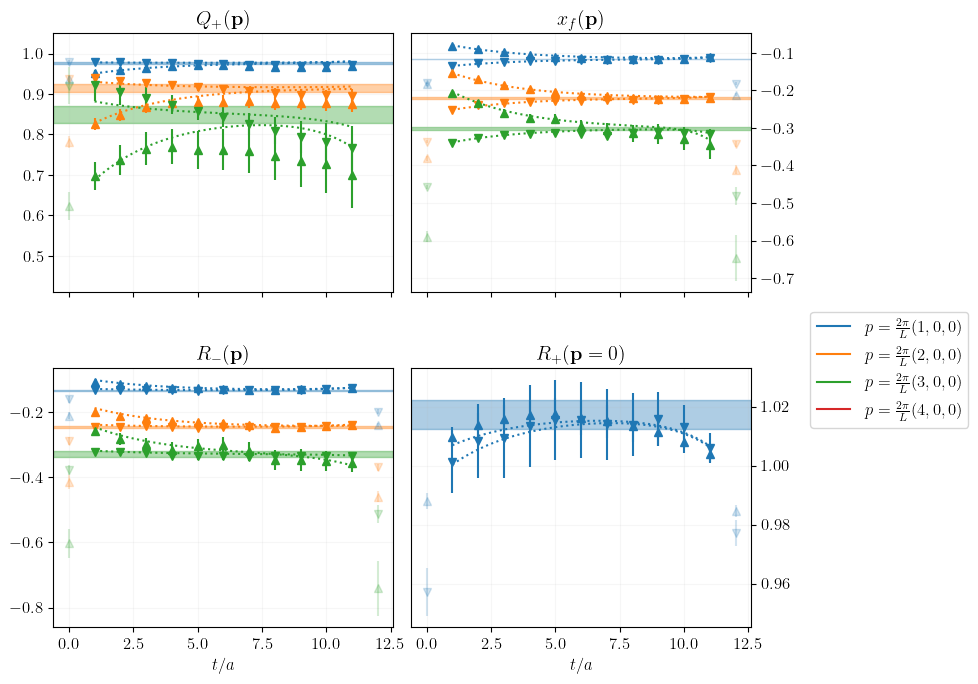

In [247]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

f, ax = plt.subplots(2,2,figsize=(10,7), sharex=True)

rset.plot_fit('QPLUS' ,fit,ax[0,0])
ax[0,0].set_title(r'$Q_{+}(\mathbf{p})$')
# ax[0,0].set_ylim(0.8,1.05)
ax[0,0].set_ylim(ymax=1.05)
ax[0,0].grid(alpha=0.1)

rset.plot_fit('XF'    ,fit,ax[0,1])
ax[0,1].yaxis.set_label_position("right")
ax[0,1].yaxis.tick_right()
ax[0,1].set_title(r'$x_f(\mathbf{p})$')
# ax[0,1].set_ylim(ymin=-0.3)
ax[0,1].grid(alpha=0.1)


rset.plot_fit('RMINUS',fit,ax[1,0])
ax[1,0].grid(alpha=0.1)
# ax[1,0].set_ylim(ymin=-0.3)
ax[1,0].set_title(r'$R_-(\mathbf{p})$')
ax[1,0].set_xlabel(r'$t/a$')

rset.plot_fit('RPLUS' ,fit,ax[1,1])
ax[1,1].yaxis.set_label_position("right")
ax[1,1].yaxis.tick_right()
# ax[1,1].set_ylim(ymin=0.9)
ax[1,1].grid(alpha=0.1)
ax[1,1].set_title(r'$R_+(\mathbf{p}=0)$')
ax[1,1].set_xlabel(r'$t/a$')


ax[1,1].errorbar([],[],color='C0',label=r'$p = \frac{2\pi}{L}(1,0,0)$')
ax[1,1].errorbar([],[],color='C1',label=r'$p = \frac{2\pi}{L}(2,0,0)$')
ax[1,1].errorbar([],[],color='C2',label=r'$p = \frac{2\pi}{L}(3,0,0)$')
ax[1,1].errorbar([],[],color='C3',label=r'$p = \frac{2\pi}{L}(4,0,0)$')
ax[1,1].legend(bbox_to_anchor=(1.15, 1.25))



# plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplots_adjust(wspace=0.05)

plt.tight_layout()

# plt.savefig(
#     f'/Users/pietro/code/latex/Lattice2024/beamer-presentation-template/PLOTS/ratio_gfit_D.pdf',
#     transparent=True
# )




# Stability test

In [241]:
tmins = [1,2,3,4]

aux = []
TIC = []
pfs = []
for tmin in tqdm(tmins):
    fit = rset.fit(tmin=tmin, priors=priors,**cov_specs)   
    aux.append(
        {k: p for k,p in fit.p.items() if k.endswith('f0')}
    )
    
    res = rset.fit_result(tmin,fit,priors=priors,verbose=False)
    TIC.append(res['chi2aug'] - 2*res['chiexp'])
    pfs.append(res['pstd'])

100%|██████████| 4/4 [00:02<00:00,  1.41it/s]


In [242]:
w = np.exp(-np.array(TIC)/2)
w /= sum(w)
for i,weight in enumerate(w):
    print(f'{tmins[i] = },    {weight = },    {pfs[i] = }')

tmins[i] = 1,    weight = 0.9999995109485724,    pfs[i] = 0.6892831804385479
tmins[i] = 2,    weight = 4.890513665820046e-07,    pfs[i] = 0.6699382512796499
tmins[i] = 3,    weight = 6.109216310405352e-14,    pfs[i] = 0.7046525825989521
tmins[i] = 4,    weight = 9.95102280250038e-21,    pfs[i] = 0.8576166454208465


In [243]:
df = pd.DataFrame(aux)
df

,RPLUS_000_f0,QPLUS_100_f0,RMINUS_100_f0,XF_100_f0,QPLUS_200_f0,RMINUS_200_f0,XF_200_f0,QPLUS_300_f0,RMINUS_300_f0,XF_300_f0
0,1.0174(49),0.9766(29),-0.1346(20),-0.1165(12),0.9150(98),-0.2469(37),-0.2200(22),0.848(21),-0.3299(90),-0.3011(44)
1,1.060(53),0.984(18),-0.142(17),-0.1175(15),0.971(85),-0.263(29),-0.2229(26),1.03(25),-0.345(50),-0.3063(56)
2,1.083(93),1.010(53),-0.183(74),-0.1193(18),1.02(18),-0.34(13),-0.2245(30),1.15(46),-0.47(21),-0.3112(72)
3,1.0187(82),0.9720(61),-0.1340(61),-0.1197(37),0.898(16),-0.248(12),-0.2251(71),0.822(45),-0.354(26),-0.319(16)


/var/folders/7m/b37v945d74n14brv9wkfxwpw0000gn/T/ipykernel_19822/4150968021.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


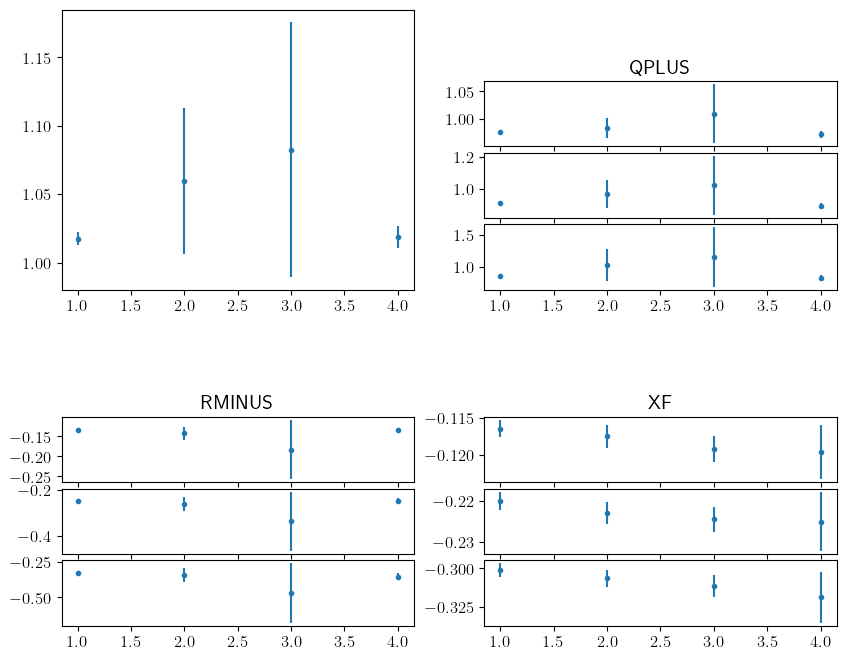

In [244]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)


inner = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0], wspace=0.1, hspace=0.1)
ax = plt.Subplot(fig,inner[0])
rs = df['RPLUS_000_f0'].values
ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
fig.add_subplot(ax)




inner1 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[1], wspace=0.1, hspace=0.1)
inner2 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[2], wspace=0.1, hspace=0.1)
inner3 = gridspec.GridSpecFromSubplotSpec(len(MOMLIST), 1, subplot_spec=outer[3], wspace=0.1, hspace=0.1)

for j,mom in enumerate(MOMLIST):
    if mom=='000':
        continue

    ax = plt.Subplot(fig,inner1[j])
    rs = df[f'QPLUS_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('QPLUS')
    fig.add_subplot(ax)

    ax = plt.Subplot(fig,inner2[j])
    rs = df[f'RMINUS_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('RMINUS')
    fig.add_subplot(ax)

    ax = plt.Subplot(fig,inner3[j])
    rs = df[f'XF_{mom}_f0'].values
    ax.errorbar(tmins, gv.mean(rs), gv.sdev(rs), fmt='.')
    if mom=='100':
        ax.set_title('XF')
    fig.add_subplot(ax)


fig.show()

In [92]:
df

,RPLUS_000_f0,QPLUS_100_f0,RMINUS_100_f0,XF_100_f0,QPLUS_200_f0,RMINUS_200_f0,XF_200_f0,QPLUS_300_f0,RMINUS_300_f0,XF_300_f0,QPLUS_400_f0,RMINUS_400_f0,XF_400_f0
0,1.0416(54),0.9806(21),-0.0905(13),-0.07650(71),0.9498(39),-0.1773(16),-0.1499(10),0.9109(79),-0.2530(28),-0.2186(18),0.865(13),-0.3160(54),-0.2794(33)
1,1.0438(67),0.9817(23),-0.0886(15),-0.07697(97),0.9482(41),-0.1770(20),-0.1537(14),0.9110(81),-0.2552(37),-0.2242(22),0.870(13),-0.3252(75),-0.2876(38)
2,1.048(10),0.9842(33),-0.0886(24),-0.0774(11),0.9517(57),-0.1812(44),-0.1544(17),0.919(10),-0.268(10),-0.2261(33),0.875(17),-0.355(21),-0.2887(51)
3,1.0397(73),0.9819(26),-0.0892(23),-0.0792(14),0.9526(48),-0.1786(36),-0.1563(19),0.9128(88),-0.2610(67),-0.2272(31),0.856(15),-0.340(13),-0.2879(57)
